# 2 Machine Learning for Regression


### 2.1 Car Price prediction Project [url](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv)

In [1]:
# Import libraries
import pandas as pd
import numpy as np

In [3]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"

data = pd.read_csv(url)
data.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135



### 2.2 Data preparation
Cleaning columns and values before EDA

In [7]:
# cleaning column names
data.columns.str.replace(' ', '_').str.lower()

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [9]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [11]:
df = data.copy()

In [152]:
[col for col in df.columns if df[col].dtype == 'object']

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [14]:
# cleaning all Values of string's columns

strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

Here is the line that helps me to clean all value in these strings columns.

In [21]:
for col in strings:
    df[col] = df[col].str.replace(' ', '_').str.lower()

In [22]:
df.head()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


### 2.3 Exploratory data analysis

In [24]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique(), '\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48 

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914 

year
[2011 2012 2013 1992 1993]
28 

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10 

engine_hp
[335. 300. 230. 320. 172.]
356 

engine_cylinders
[ 6.  4.  5.  8. 12.]
9 

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5 

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4 

number_of_doors
[ 2.  4.  3. nan]
3 

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71 

vehicle_size
['compact' 'midsize' 'large']
3 

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16 

highway_mpg
[26 28 27 25 24]
59 

city_mpg
[19 20 18 17 16]
69 

popularity
[3916 3105  819  617 1013]
48 

msrp
[46135 40650 

#### Visualisation of Distribution
using matplotlib

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:>

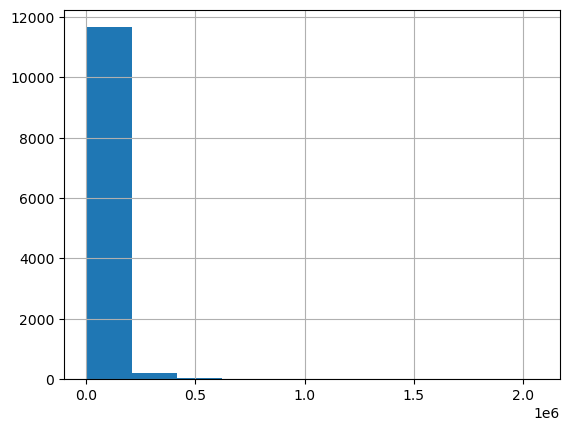

In [26]:
# 1 method
df.msrp.hist()

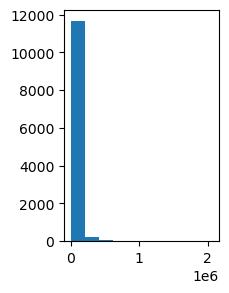

In [28]:
# 2 method
plt.figure(figsize=(2,3))
plt.hist(df.msrp)
plt.show()

<AxesSubplot:xlabel='msrp', ylabel='Count'>

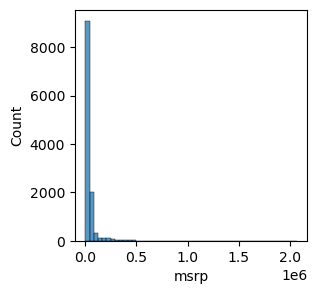

In [33]:
# 3 Method using sns

plt.figure(figsize=(3,3))
sns.histplot(df.msrp, bins=50)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

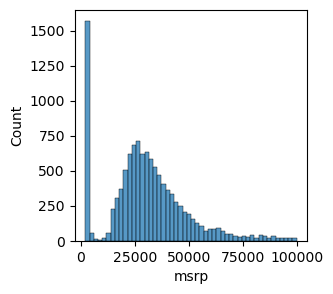

In [34]:
plt.figure(figsize=(3, 3))
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [153]:
df.msrp[df.msrp < 100000].mean()

30476.444395175593

This distribution has a loooong tail ain't good for ML model. <br>
We need get ride of that tail.
And also the variability of the price could make the model unprecised

Solution is to rescale these values by normalizing using log

In [36]:
np.log1p([0,1,10,100,1000])

array([0.        , 0.69314718, 2.39789527, 4.61512052, 6.90875478])

the issue is we don't have cars with the value 0 so we'd better start at 1

In [38]:
np.log1p([0 + 1, 1 + 1, 10 + 1, 100 + 1, 1000 + 1])

array([0.69314718, 1.09861229, 2.48490665, 4.62497281, 6.90975328])

In [155]:
# let's use it with the price [msrp] col
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

let us visualize

<AxesSubplot:xlabel='msrp', ylabel='Count'>

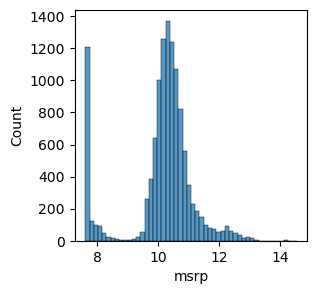

In [40]:
plt.figure(figsize=(3, 3))
sns.histplot(price_logs, bins=50)

Now we have a normal distribution

In [44]:
# this means to have back the price we need to use e(x)

print("price recalculate using np.exp():", np.exp(10.739349))

df.msrp[0]

price recalculate using np.exp(): 46136.00759881907


46135

##### Missing Values

In [46]:
df.isna().sum()
# or df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [157]:
import seaborn as sns

sns.heatmap(df.isna().sum())

IndexError: Inconsistent shape between the condition and the input (got (16, 1) and (16,))

### 2.4 Setting up the validation framework

In [66]:
from sklearn.model_selection import train_test_split

n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test # or int(n * 0.6) but with this we may miss some line

In [67]:
n

11914

In [68]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [69]:
# example of a random localisation of lines
df.iloc[[10,55,35,84]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
55,bmw,2_series,2017,premium_unleaded_(recommended),248.0,4.0,automatic,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,35,24,3916,33150
35,mercedes-benz,190-class,1991,regular_unleaded,130.0,4.0,manual,rear_wheel_drive,4.0,luxury,compact,sedan,26,18,617,2000
84,chrysler,200,2017,flex-fuel_(unleaded/e85),184.0,4.0,automatic,front_wheel_drive,4.0,flex_fuel,midsize,sedan,36,23,1013,27795


In [70]:
df_val = df.iloc[:n_val] 
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]


The problem those dataset aren't randomized , we could have just one brand on a set

In [71]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [72]:
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [73]:
# Solution we need to shuffle using numpy

np.random.seed(2)
np.random.shuffle(idx)

In [74]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [75]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [76]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [77]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [78]:
# Normalization of target

y_train= np.log1p(df_train.msrp.values)
y_val= np.log1p(df_val.msrp.values)
y_test= np.log1p(df_test.msrp.values)

In [79]:
# let's delete now the original price we might accidently use it
del df_test['msrp']
del df_train['msrp']
del df_val['msrp']

### 2.5 Linear Regression

In [80]:
# we pick up randomly a car 
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [85]:
# Columns to keep ["engine_hp", "city_mpg" , "popularity"]
df_train.loc[10, ["engine_hp", "city_mpg", "popularity"]].values

array([453.0, 11, 86], dtype=object)

In [88]:
xi = list(df_train.loc[10, ["engine_hp", "city_mpg", "popularity"]].values)
xi

[453.0, 11, 86]

In [159]:
pred = 7.17
[0.02, 0.037, 0.086]

pred = pred + 453.0 * 0.01
pred = pred + 11 * 0.04
pred = pred + 86 * 0.002
pred

12.312

In [ ]:
def g(xi)
return 

In [100]:
# let's start by using w0 = 0
w0 = 0
w = [1,1,1]

In [101]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [160]:
np.array([[1], [236], [523]]) + 25

array([[ 26],
       [261],
       [548]])

In [102]:
linear_regression(xi)

550.0

In [103]:
xi
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [104]:
linear_regression(xi)

12.312

In [105]:
np.exp(linear_regression(xi))

222348.2221101062

In [ ]:
model.predict()

In [106]:
y_train[10]

13.08107460729463

### 2.6 Linear regression vector form

In [107]:
def dot(xi, w):
    n = len(xi)

    res = 0.0

    for j in range(n):
        res = res + xi[j] * w[j]

    return res

For a Single value

In [108]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [130]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [139]:
def lin_reg2(xi):
    return np.array(xi).dot(w) + w0

In [140]:
lin_reg2(xi)

12.312000000000001

For multiple values

In [112]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [113]:
linear_regression(xi)

12.312

In [163]:
w

[0.01, 0.04, 0.002]

In [133]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [161]:
X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [162]:
def linear_regression(X):
    return X.dot(w_new)

In [135]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

In [143]:
for x in X:
    print(lin_reg2(x[1:]))

12.379999999999999
13.552
12.312000000000001


In [172]:
def lin_reg2Mult(xi):
    return np.array(xi).dot(w_new)

In [173]:
lin_reg2Mult(X)

array([12.38 , 13.552, 12.312])

### 2.7 Training a linear regression model

$$X \times w = y$$
Normally to find w weight we need just to divide by X
$$X \times X^{-1} \times w =y \times X^{-1} $$

But instead we will go through the gram matrix <br>
$matrix Gram = X^T\times X$
<br>
as we have calculate previously y using Transpose

$$(X \times X^T)^{-1} (X^T \times X) \times w = (X \times X^T)^{-1} \times X^T \times y $$

$$I \times w = (X \times X^T)^{-1} \times X^T \times y $$



In [174]:
def train_linear_regression(X,y):
    pass

In [207]:
# lets choose randomly our variables
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

$matrix Gram = X^T\times X$

In [208]:
XGram = X.T.dot(X)
XGram

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [209]:
X_gram_inv = np.linalg.inv(XGram)
X_gram_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [210]:
X_gram_inv.dot(XGram).round(1)

array([[ 1., -0., -0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

$$I \times w = (X \times X^T)^{-1} \times X^T \times y $$

In [211]:
y=[10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [212]:
X_gram_inv.dot(X.T).dot(y)

array([ 26.08419498, 286.12285934,   3.93813107])

To make use w0 , need to add 1s

In [213]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [188]:
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 4.530e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 8.600e+01],
       [1.000e+00, 3.800e+01, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.100e+01, 8.600e+01]])

In [189]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [191]:
X_gram = X.T.dot(X)
X_gram_inv = np.linalg.inv(X_gram)
w_full = X_gram_inv.dot(X.T).dot(y)
w_full

array([ 2.58447541e+04, -1.60890647e+01, -1.99472549e+02, -1.22802883e+00])

In [214]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [215]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    X_gram = X.T.dot(X)
    X_gram_inv = np.linalg.inv(X_gram)
    w_full = X_gram_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [216]:
train_linear_regression(X, y)

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))